# Chapter 3. Estimation

## The dice problem

A box holds 5 different-sided dice: a 4-sided, 6-sided, 8-sided, 12-sided, and 20-sided.

I select a single die, roll it, and get a 6. 

**Question:** What is the probability that I selected each die?

*Strategy:*

1. choose a representation for the hypothesis
2. choose a representation for the data
3. write the liklihood function

### Create a class for the calculations

First, I recreated the `Pmf` class from Chapter 2, renaming some of the attributes. I also took this as a chance to refamilliarize myself with the processes.

In [1]:
class Pmf:
    '''
    A class to define and maitain a probability mass function
    '''
    def __init__(self):
        self.hypotheses = dict()
    
    
    # sets the `hypo` to the probability `prob`
    def Set(self, hypo, prob):
        self.hypotheses[hypo] = prob
    
    
    # increments the object `hypo` by `n`
    # useful for building the PMF from an iterator
    def Incr(self, hypo, n):
        if obj in self.options.keys():
            self.hypotheses[hypo] += 1
        else:
            self.hypotheses[hypo] = 1
    
    
    # nromalize the PMF back to a sum of 1
    def Normalize(self):
        possible_hypos = sum(self.hypotheses.values())
        if possible_hypos > 0:
            for hypo in self.hypotheses.keys():
                self.hypotheses[hypo] = self.hypotheses[hypo] / possible_hypos
        else:
            print("No values set")
    
    
    # return the probability of hypothesis `hypo`
    def Prob(self, hypo):
        if obj in self.hypotheses.keys():
            print(self.hypotheses[hypo])
        else:
            print(hypo + "has not been set, yet")
    
    
    # multiply the current prob of object `hypo` by `new_p`
    def Mult(self, hypo, new_p):
        if hypo in self.hypotheses.keys():
            self.hypotheses[hypo] *= new_p
    
    
    # print statement
    def __str__(self):
        msg = ""
        for hypo in self.hypotheses.keys():
            msg = msg + str(hypo) + ': ' + str(self.hypotheses[hypo]) + '\n'
        return(msg)

The `Suite` class inherits from `Pmf` and is just a simple wrapper that creates the PMFs and updates them based on new data. 

In [2]:
class Suite(Pmf):
    '''
    Creating a Pmf for multiple hypotheses
    '''
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
    
    
    # update the hypotheses using new data
    def Update(self, data):
        for hypo in self.hypotheses.keys():
            like = self.Liklihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

Then, I create class `Dice` that inherits from `Suite` and `Pmf` and adds the `Liklihood()` method. The `Liklihood()` method calculates the liklihood of observing the data under the hypothesis. `Update()`, in the parent `Suite` class, runs each hypothesis through `Liklihood()` when new data is input.

In [3]:
class Dice(Suite):
    '''
    Which dice was chosen from the suite of possible die
    '''
    
    # calculate the liklihood of `data` under `hypo`
    def Liklihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

### Create the `Dice` object

I create an `Dice` object containing the possible die as the hypotheses.

In [4]:
suite = Dice([4, 6, 8, 12, 20])
print(suite)

4: 0.2
6: 0.2
8: 0.2
12: 0.2
20: 0.2



At the beginning, all die are equally likely to have been drawn. Now, I add the information from rolling a 6.

In [5]:
suite.Update(6)
print(suite)

4: 0.0
6: 0.3921568627450981
8: 0.2941176470588236
12: 0.19607843137254904
20: 0.11764705882352945



I then rolled the dice a few more times and updated my hypotheses.

In [6]:
# new rolls
new_rolls = [6, 8, 7, 7, 5, 4]
for roll in new_rolls:
    suite.Update(roll)

Now, the liklihoods are beginning to converge on the selected dice being 8-sided.

In [7]:
print(suite)

4: 0.0
6: 0.0
8: 0.9432484536722127
12: 0.055206128061290875
20: 0.0015454182664965536



What if I rolled a 9?

In [8]:
suite.Update(9)
print(suite)

4: 0.0
6: 0.0
8: 0.0
12: 0.9834812908813502
20: 0.016518709118649718



## The locomotive problem

### Define the problem

**Problem:** A railroad numbers its locomotives in order $1$ through $N$. One day, you see a locomotive with the number $60$. Estimate how many locotmotives the railroad has.

We cknow there are at least $60$ locomotives. To figure out how many more, we break the problem into two steps:

1. What did we know about $N$ before we saw the data (i.e. what is the *prior*)?
2. For any given value of N, what is the liklihood of seeing a locomotive with the number $60$ (i.e. *the likliood of seeing the data*)?

The prior is fairly arbitarary at this point. Downey begins by assuming that $N$ is likely to be somewhere between $1$ and $1,000$.

In [9]:
hypos = range(1, 1001)

We now claim that there is equal liklihood of seeing any of the trains, thus $1/N$.

### Create the `Train` class

In [10]:
class Train(Suite):
    '''
    How many trains are there?
    '''
    
    def Liklihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

### Estimate the number of trains

I created a `Train` object and then updated the hypotheses with the observation of seeing the locomotive number $60$.

In [11]:
suite = Train(hypos)
suite.Update(60)

In [12]:
import matplotlib.pyplot as plt
plt.plot(suite.hypotheses.values())
plt.ylabel("probability")
plt.xlabel("number of trains")
plt.title("Current estimate of number of trains")
plt.show()

<Figure size 640x480 with 1 Axes>

Understandably, the best choice is to guess $60$ as the answer can't be anything less, and it has the fewest possible number of trains. However, we could also suggest guessing the mean of the posterior probability.

In [13]:
# calculate the mean of the posterior of a Suite object `s`
def Mean(s):
    total = 0
    for hypo, prob in s.hypotheses.items():
        total += hypo * prob
    return total

In [14]:
Mean(suite)

333.41989326371095

Therefore, $333$ is the mean of the posterior probabiilty and could be another reasonable suggestion for the estimation.

### What about that prior?

The original prior was that there are somewhere between $1$ and $1000$ locomotives, and each of those possiblities is equally likely. First, if we were to change that upper limit, so to does the mean of the posterior probability (the value with the highest probability will always be $60$, though).

In [15]:
# with the upper limit of 2000 trains
suite2 = Train(range(1, 2001))
suite2.Update(60)
Mean(suite2)

552.179017164631

In [16]:
# with the upper limit of 500 trains
suite3 = Train(range(1, 501))
suite3.Update(60)
Mean(suite3)

207.079227983409

The mean of the posterior moves dramatically depending on how many locomotives we think could possibly be apart of one company.

However, the largest limitation is really the lack of data - we only have a single data point: we saw train $60$. If we were to see a few other trains, then the mean of the posterior probabilities begin to converge.

In [17]:
# make 3 suites with different upper limits for the number of trains
suite = Train(range(1, 1001))
suite2 = Train(range(1, 2001))
suite3 = Train(range(1, 501))

# update the posterior probabilities after seeing 3 trains
for data in [30, 60, 90]:
    suite.Update(data)
    suite2.Update(data)
    suite3.Update(data)


# print the means of the posterior probabilities
print(Mean(suite))
print(Mean(suite2))
print(Mean(suite3))

164.30558642273363
171.33818109150937
151.84958795903822


Now, the means of the posterior probabilities are much closer with only a few more data points.

### A new prior

As stated above, we bagen by assuming that any number of trains between $1$ and our upper limit, $1000$, trains was equally likely. We were therefore using a uniform distribution. Instead, one that decreases as the values get larger would be preferrable. For example, we can use the power law: the number of companies with a given number of trains is inversely proportionate to the number of locomotives.

$$ \text{PMF}(x) \propto (\frac{1}{x})^{\alpha} $$

where $\alpha$ is a parameter usually near $1$.

We can recode the `Train` class to use this distribution for the prior. 

In [18]:
class PowerTrain(Suite):
    '''
    To estimate the number of trains total after seeing a select number.
    The prior distribution follows the power law
    '''
    
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize
    
    # calculate the liklihood of `data` under `hypo`
    def Liklihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [19]:
hypos = range(1, 1001)
suite_power = PowerTrain(hypos)
suite_power.Update(60)

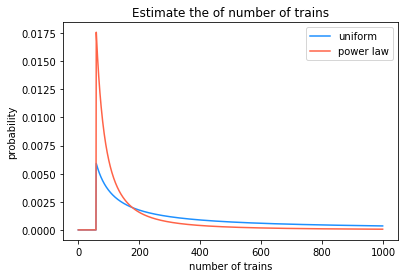

In [20]:
# remake the original Train estimations to plot for comparison
suite = Train(hypos)
suite.Update(60)

plt.plot(suite.hypotheses.values(), color = "dodgerblue", label = "uniform")
plt.plot(suite_power.hypotheses.values(), color = "tomato", label = "power law")
plt.ylabel("probability")
plt.xlabel("number of trains")
plt.title("Estimate the of number of trains")
plt.legend()
plt.show()

The new distribution still has a spike at the lowest possible value, but the distribution is now much more shifted towards lower values.

Additionally, with the addition of more data points (i.e. more train numbers), the mean values of the posterior distributions converges much more quickly for different upper limits on the priors.

In [21]:
# make 3 suites with different upper limits for the number of trains
power_suite = PowerTrain(range(1, 1001))
power_suite2 = PowerTrain(range(1, 2001))
power_suite3 = PowerTrain(range(1, 501))

# update the posterior probabilities after seeing 3 trains
for data in [30, 60, 90]:
    power_suite.Update(data)
    power_suite2.Update(data)
    power_suite3.Update(data)


# print the means of the posterior probabilities
print(Mean(power_suite))
print(Mean(power_suite2))
print(Mean(power_suite3))

133.27523137503124
133.99746308073065
130.70846986256007


## Credible intervals

The goal is always to summarise the posterior. We have so far accomplished this by using the the maximum liklihood and the expected value (weighted average value). Next, I sought to determine an interval such that there is a 90% chance that the unknown value falls within it. This is called the **credible interval**.

An easy way to do this is record the values that correspond to probabilities 5% and 95% (i.e. the 5th and 9th percentiles).

In [23]:
def Percentile(pmf, percentage):
    p = percentage / 100.0
    total = 0
    for val, prob in pmf.hypotheses.items():
        total += prob
        if total >= p:
            return val

interval = Percentile(power_suite, 5), Percentile(power_suite, 95)
print(interval)

(91, 242)


## Cumulative Distribution functions

The above function found the value at which `percentage` of the values were covered. A function that defines this value for all percentages is a **cumulative distribution function**. This function can be calculated from a PMF and back as they contian the same information. Creating the CDF from a PMF take $O(n)$ time and looking up a value from the CDF takes $O(\log{n})$ times (because it is stored in a `dict`, presumably).

---

After finishing this notebook, I moved the `Pmf` and `Suite` classes to "my_suite.py" for further use via `import` statements.